TEXT SENTIMENT ANALYSIS on YOUTUBE VIDEO, LINK: =https://www.youtube.com/watch?v=TNq5pf5dLzQ

The VIDEO ID is the code is in the YouTube Video link itself after v= "xxxxxxxx"

USING GOOGLE API > Create Credential > Create Project > Create API key > Activate API key

In [1]:
# IMPORT PACKAGES

# pip install google-api-python-client pandas

#  pip install wordcloud
#  nltk.download('stopwords')
#  nltk.download('vader_lexicon')
#######################################

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# EXAMPLE
#   API= "YOUR_API_KEY"
#   For example, in the URL "

#  https://www.youtube.com/watch?v=dQw4w9WgXcQ", the video ID is "dQw4w9WgXcQ".

# MY_video_ID= " TNq5pf5dLzQ "


In [ ]:
import pandas as pd
import googleapiclient.discovery

# Initialize the YouTube API
def get_youtube_service(api_key):
    youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)
    return youtube

# Function to get comments from a video
def get_video_comments(youtube, video_id, max_results=100):
    comments = []
    next_page_token = None

    while len(comments) < 10000:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=min(max_results, 100),  # API allows max 100 per request
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        # Check if there is another page of comments
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return comments[:10000]  # Return only 50k comments

# Main function to extract comments
def main(api_key, video_id):
    youtube = get_youtube_service(api_key)
    comments = get_video_comments(youtube, video_id)

    # Save comments to a Pandas DataFrame
    df = pd.DataFrame(comments, columns=["Comments"])
    df.to_csv('youtube_comments.csv', index=False)
    print(f"Extracted {len(comments)} comments. Saved to youtube_comments.csv.")

# Replace with your API key and video ID
API_KEY = 'YOUR_API_KEY'
VIDEO_ID = 'TNq5pf5dLzQ'  # Example: 'dQw4w9WgXcQ'

main(API_KEY, VIDEO_ID)


Extracted 545 comments. Saved to youtube_comments.csv.


In [ ]:
df_comments= pd.read_csv('youtube_comments.csv')
df_comments.shape
df_comments.dtypes

,0
Comments,object


In [ ]:
df_comments

,Comments
0,My bad for leaking your interview question but...
1,Thanks for the doom scroll. I will also tell y...
2,I have a degree from 20 years ago. If I were ...
3,Bro discrete math is my absolute fucking favor...
4,Why are you paying 10s of thousands of dollars...
...,...
540,I think we still have a chance
541,damn he’s consistent
542,AYEEE You uploaded
543,I&#39;m starting my MSc Computer Science &amp;...


In [ ]:
df_comments['Comments'] = df_comments['Comments'].astype(str)

In [ ]:
pip install NLTK


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

df_comments['Cleaned_comments'] = df_comments['Comments'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_comments['Cleaned_comments'].dtypes

dtype('O')

In [ ]:
#  pip install wordcloud

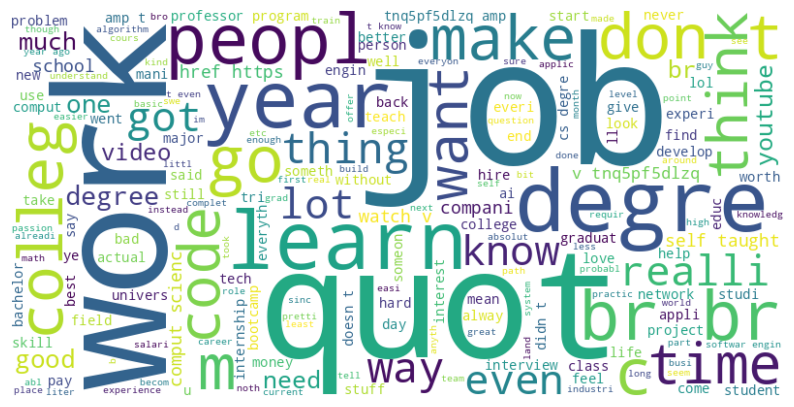

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame df_comments

# Create a WordCloud object
text = " ".join(df_comments['Cleaned_comments'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
# Create a list of all words from the cleaned comments
all_words = ' '.join(df_comments['Cleaned_comments']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 20 most frequent words
top_words = word_counts.most_common(20)
top_words


[('degre', 190),
 ('get', 157),
 ('job', 156),
 ('work', 124),
 ('like', 115),
 ('cs', 109),
 ('learn', 104),
 ('peopl', 103),
 ('year', 95),
 ('go', 89),
 ('colleg', 81),
 ('make', 80),
 ('even', 79),
 ('comput', 78),
 ('i&#39;m', 68),
 ('it&#39;', 67),
 ('don&#39;t', 66),
 ('know', 65),
 ('want', 65),
 ('think', 61)]

In [ ]:
# IMPORT more Libraries
import pandas as pd
from textblob import TextBlob

In [ ]:
# DEFINE THE POLARITY AND SUBJECTIVITY
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df_comments['sentiment'] = df_comments['Cleaned_comments'].apply(get_sentiment)

KEY LEGEND: The **polarity attribute** represents the sentiment orientation,*** ranging from -1 (negative) to 1 (positive).***
The **subjectivity attribute** represents the degree of **subjective or objective content**, *ranging from 0 (objective) to 1 (subjective).*

While polarity (positive, negative, neutral) and subjectivity (factual vs. opinionated) are fundamental aspects of sentiment analysis

In [ ]:
df_comments['polarity'] = df_comments['sentiment'].apply(lambda x: x[0])
df_comments['subjectivity'] = df_comments['sentiment'].apply(lambda x: x[1])

In [ ]:
df_comments['sentiment']

,sentiment
0,"(-0.6999999999999998, 0.6666666666666666)"
1,"(0.0, 0.125)"
2,"(0.0, 0.0)"
3,"(-0.4, 0.6)"
4,"(0.0, 0.0)"
...,...
540,"(0.0, 0.0)"
541,"(0.0, 0.0)"
542,"(0.0, 0.0)"
543,"(0.14444444444444443, 0.27777777777777773)"


In [ ]:
df_comments['polarity']

,polarity
0,-0.700000
1,0.000000
2,0.000000
3,-0.400000
4,0.000000
...,...
540,0.000000
541,0.000000
542,0.000000
543,0.144444


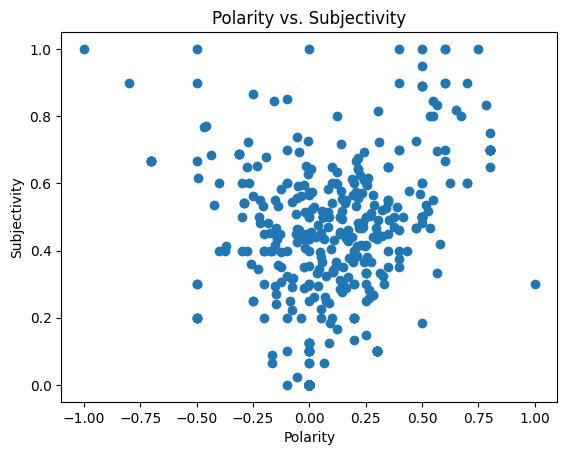

In [ ]:
# NOW LETS VISUALIZE
plt.scatter(df_comments['polarity'], df_comments['subjectivity'])
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Polarity vs. Subjectivity')
plt.show()

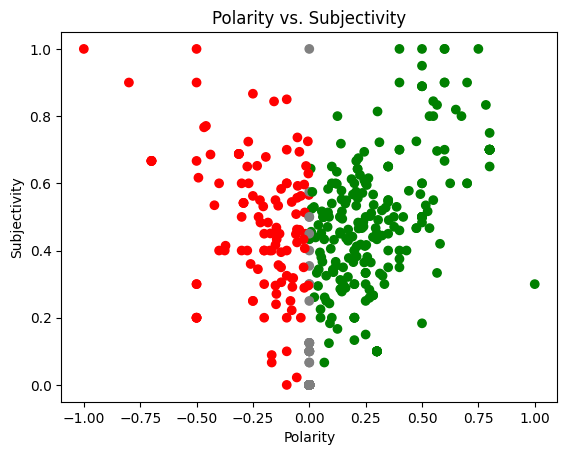

In [ ]:
#ADDING COLORS , RED= NEGATIVE , GREEN= POSITIVE, GRAY= NEUTRAL

# Define the sentiment_color function
def sentiment_color(polarity):
    if polarity < 0:
        return 'red'
    elif polarity > 0:
        return 'green'
    else:
        return 'gray'

colors = df_comments['polarity'].apply(sentiment_color)

plt.scatter(df_comments['polarity'], df_comments['subjectivity'], c=colors)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Polarity vs. Subjectivity')
plt.show()

In [ ]:
# count numbers of each sentiment in comments

positive_count = len(df_comments[df_comments['polarity'] > 0])
negative_count = len(df_comments[df_comments['polarity'] < 0])
neutral_count = len(df_comments[df_comments['polarity'] == 0])

print(f"Positive Comments: {positive_count}")
print(f"Negative Comments: {negative_count}")
print(f"Neutral Comments: {neutral_count}")

total_dots = len(df_comments)
print(f"Total Comments: {total_dots}")
positive_percent = (positive_count / total_dots) * 100
negative_percent = (negative_count / total_dots) * 100
neutral_percent = (neutral_count / total_dots) * 100

print(f"Positive: {positive_percent:.2f}%")
print(f"Negative: {negative_percent:.2f}%")
print(f"Neutral:  {neutral_percent:.2f}%")

Positive Comments: 238
Negative Comments: 118
Neutral Comments: 189
Total Comments: 545
Positive: 43.67%
Negative: 21.65%
Neutral:  34.68%


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df_comments' with a 'subjectivity' column

# Count the number of comments within specific subjectivity ranges
highly_subjective_count = len(df_comments[df_comments['subjectivity'] > 0.8])
moderately_subjective_count = len(df_comments[(df_comments['subjectivity'] > 0.4) & (df_comments['subjectivity'] <= 0.8)])
objective_count = len(df_comments[df_comments['subjectivity'] <= 0.4])

print(f"Highly Subjective Comments: {highly_subjective_count}")
print(f"Moderately Subjective Comments: {moderately_subjective_count}")
print(f"Objective Comments: {objective_count}")
# Calculate total comments
total_comments = len(df_comments)

# Calculate percentages
highly_subjective_percent = (highly_subjective_count / total_comments) * 100
moderately_subjective_percent = (moderately_subjective_count / total_comments) * 100
objective_percent = (objective_count / total_comments) * 100

# Print the results as percentages
print(f"Highly Subjective Comments: {highly_subjective_percent:.2f}%")
print(f"Moderately Subjective Comments: {moderately_subjective_percent:.2f}%")
print(f"Objective Comments: {objective_percent:.2f}%")

Highly Subjective Comments: 27
Moderately Subjective Comments: 213
Objective Comments: 305
Highly Subjective Comments: 4.95%
Moderately Subjective Comments: 39.08%
Objective Comments: 55.96%


In [ ]:
# #ADDING COLORS , RED= NEGATIVE , GREEN= POSITIVE, GRAY= NEUTRAL

# colors = df_comments['polarity'].apply(sentiment_color)

# plt.scatter(df_comments['polarity'], df_comments['subjectivity'], c=colors)
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.title('Polarity vs. Subjectivity')
# plt.show()

NameError: name 'sentiment_color' is not defined